In [1]:
import os
import keras
from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
print('Notebook run using keras:', keras.__version__)

Notebook run using keras: 2.7.0


In [2]:
inet_model = inc_net.InceptionV3()

2021-12-16 17:29:59.171750: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=(299, 299))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = inc_net.preprocess_input(x)
        out.append(x)
    return np.vstack(out)

('n01677366', 'common_iguana', 0.8835052)
('n01693334', 'green_lizard', 0.06051468)
('n01688243', 'frilled_lizard', 0.0074986396)
('n01687978', 'agama', 0.0060893903)
('n01685808', 'whiptail', 0.0021403583)


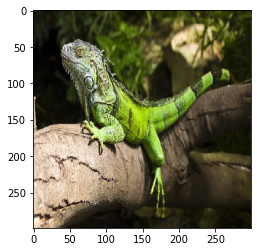

In [4]:
images = transform_img_fn([os.path.join('data','iguana.jpg')])
# I'm dividing by 2 and adding 0.5 because of how this Inception represents images
plt.imshow(images[0] / 2 + 0.5)
preds = inet_model.predict(images)
for x in decode_predictions(preds)[0]:
    print(x)

In [5]:
import lime
from lime import lime_image

In [6]:
explainer = lime_image.LimeImageExplainer()

In [20]:
explanation = explainer.explain_instance(images[0].astype('double'), inet_model.predict, top_labels=5, hide_color=0, num_samples=200)

  0%|          | 0/200 [00:00<?, ?it/s]

In [21]:
explanation.top_labels

[39, 46, 43, 42, 41]

In [22]:
from skimage.segmentation import mark_boundaries

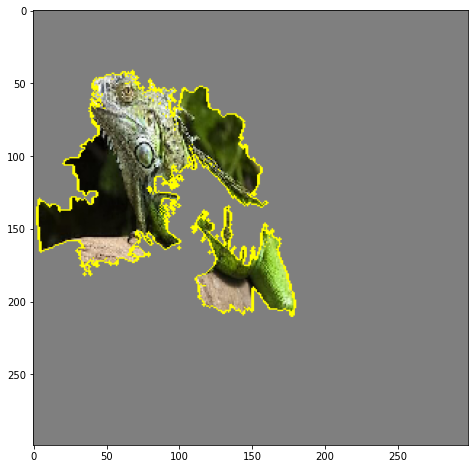

In [25]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.figure(figsize = (8,8))
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.imsave("data/unstable_explanation.png", mark_boundaries(temp / 2 + 0.5, mask))


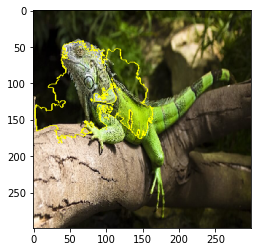

In [10]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

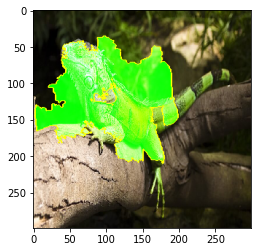

In [11]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

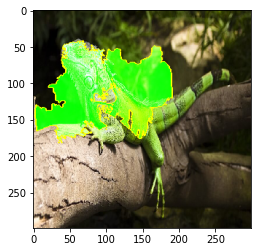

In [12]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=1000, hide_rest=False, min_weight=0.1)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

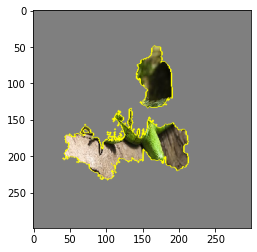

In [13]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[1], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

In [41]:
import json
with open('data/imagenet_class_index.json') as json_file:
    idx_to_cls = json.load(json_file)
    idx_to_cls = {int(k):v for k,v in idx_to_cls.items()}

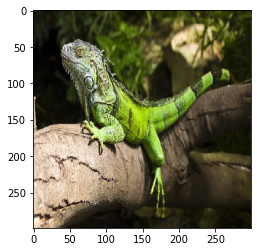

In [42]:
imgs = transform_img_fn([os.path.join('data','iguana.jpg')])
plt.imshow(imgs[0] / 2 + 0.5)